## 다중 회귀 분석

## [패키지 불러오기]

In [7]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# 데이터 시각화 패키지
import matplotlib.pyplot as plt
# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 회귀분석 패키지 
from statsmodels.formula.api import ols
# qqplot, 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 forumla(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 평가함수 패키지
from statsmodels.tools.eval_measures import rmse
# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀 모형 - 변수 선택법
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

## [데이터 불러오기]

In [8]:
df_raw = pd.read_csv("/home/pirl/Downloads/BOSTON_HOUSING.csv", engine = "python")
df_raw.head()

MEDV     CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  \
0  24.000000  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900   
1  21.600000  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671   
2  34.700001  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671   
3  33.400002  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622   
4  36.200001  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622   

   RAD  TAX    PTRATIO           B  LSTAT  
0    1  296  15.300000  396.899994   4.98  
1    2  242  17.799999  396.899994   9.14  
2    2  242  17.799999  392.829987   4.03  
3    3  222  18.700001  394.630005   2.94  
4    3  222  18.700001  396.899994   5.33

## [변수 간의 경향성 파악 - 그래프 분석]

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


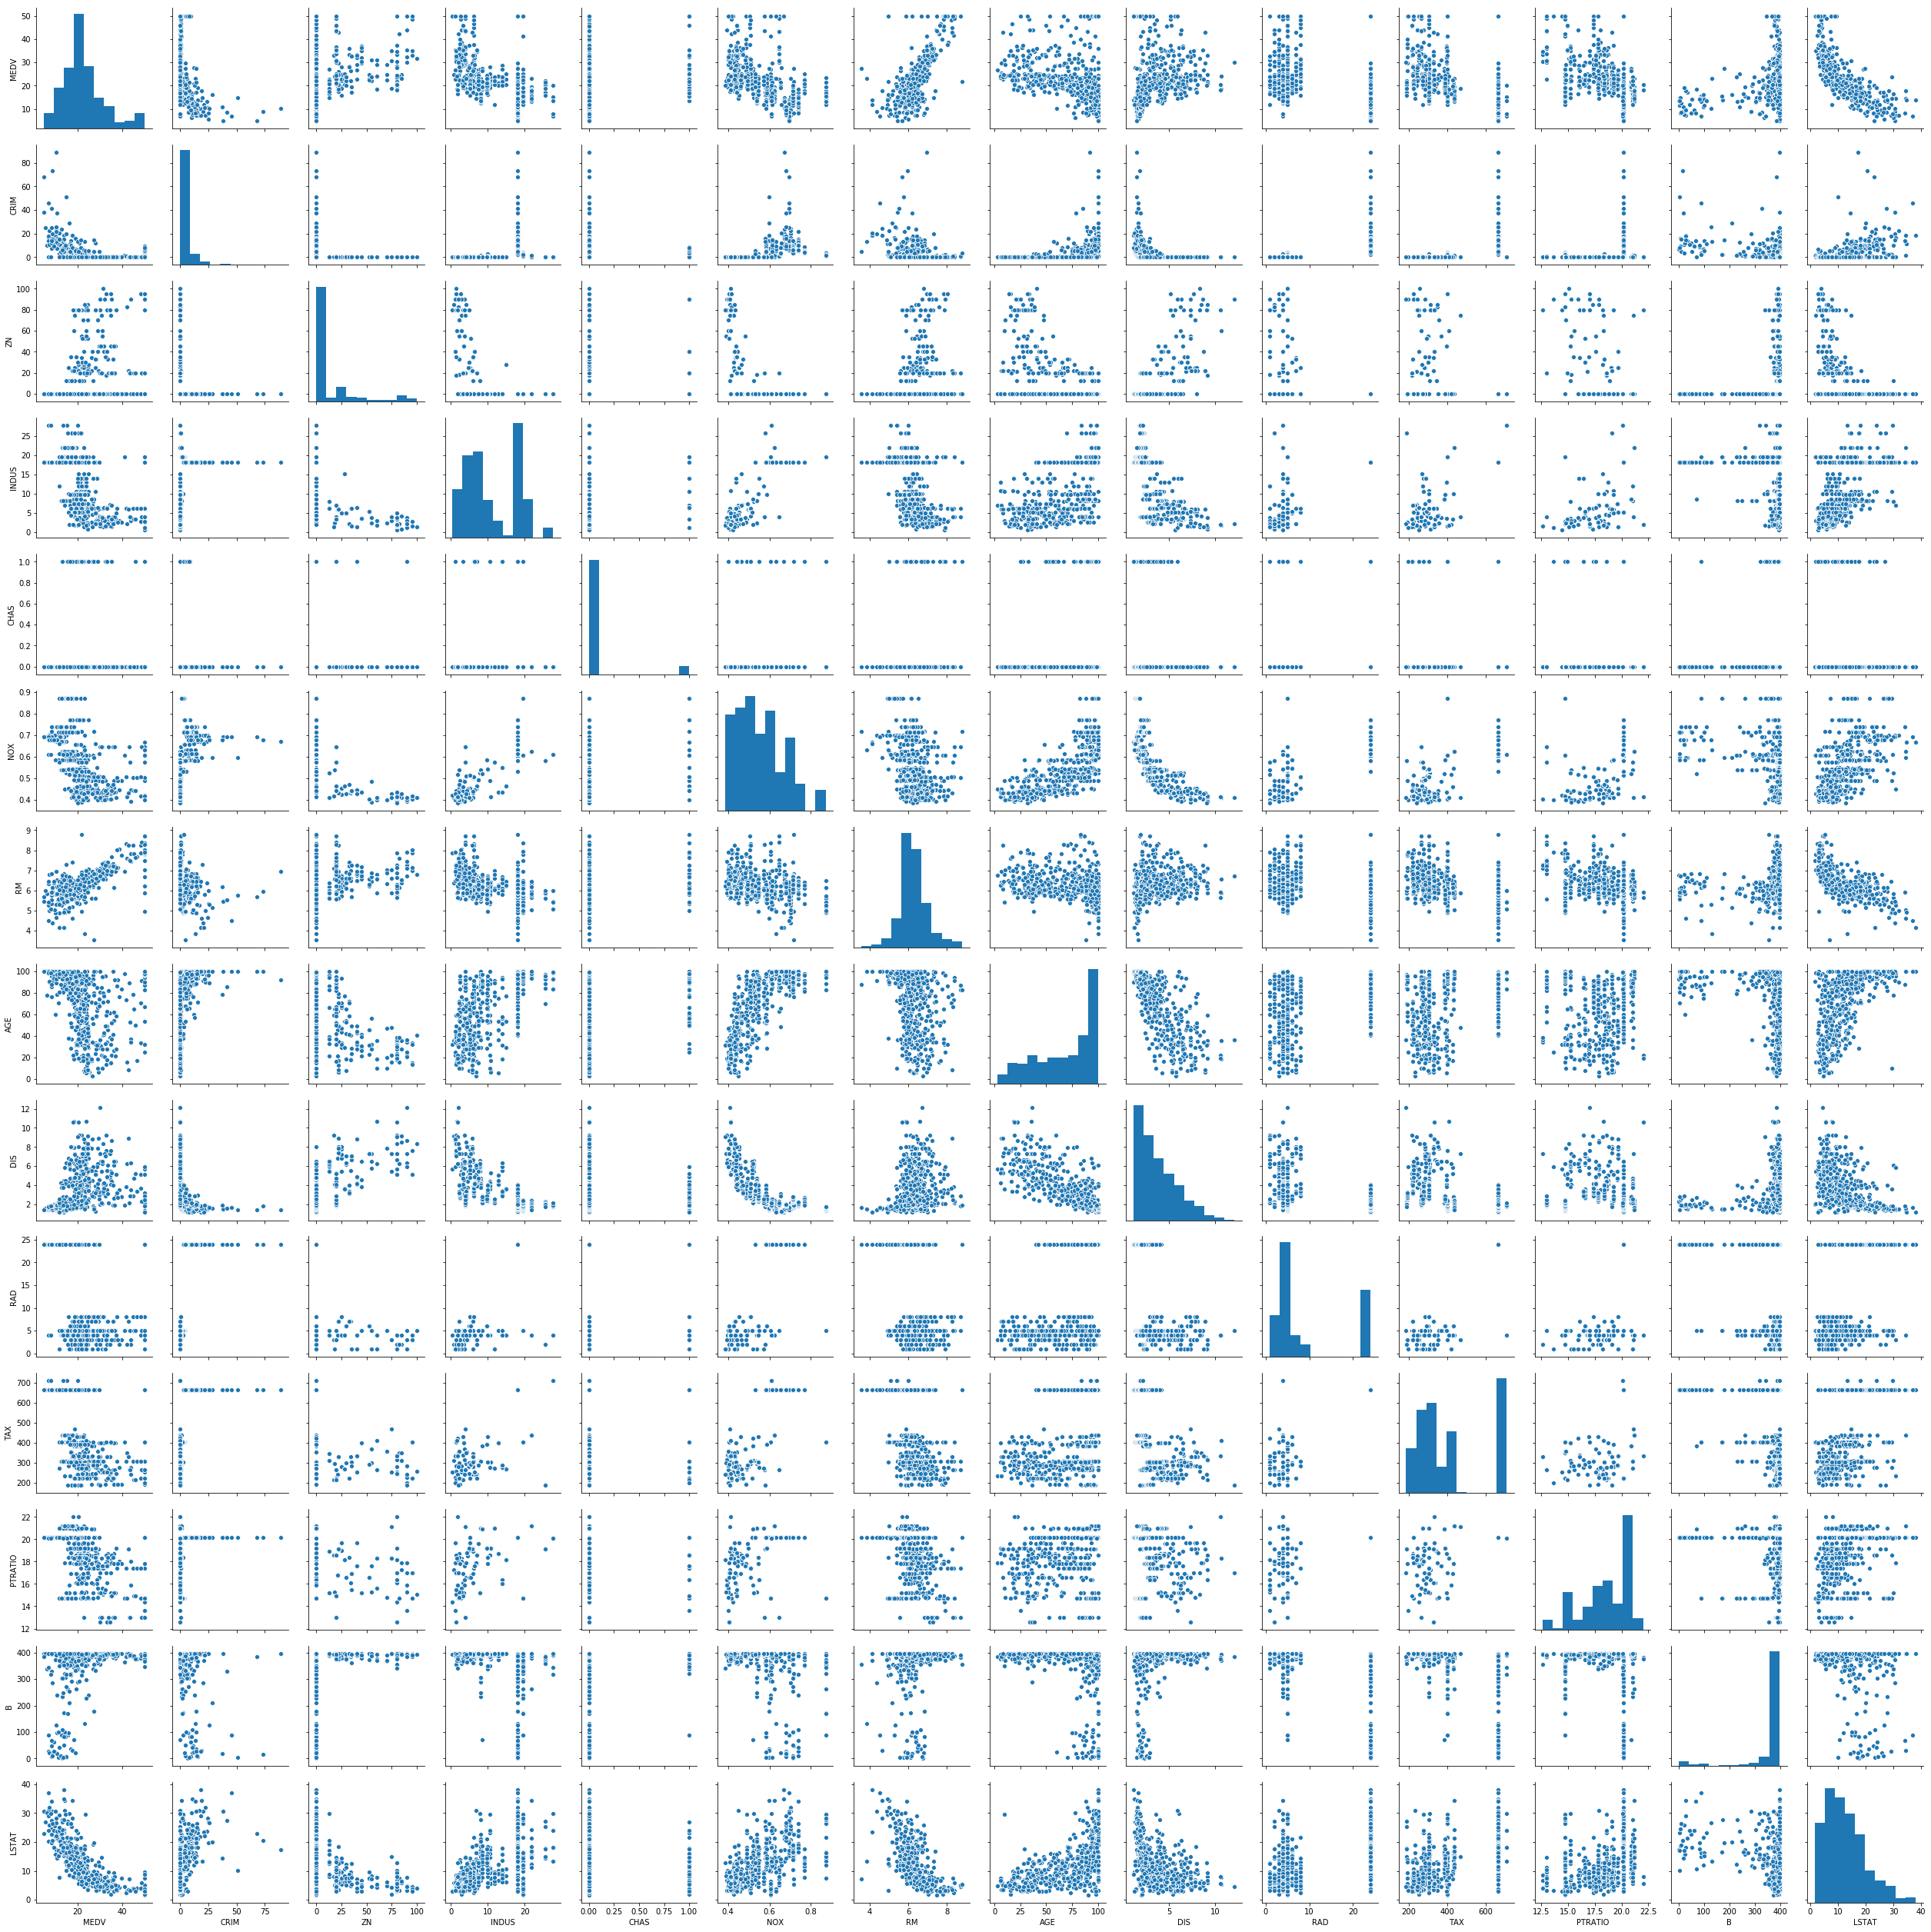

In [9]:
sns.pairplot(df_raw)

### ==> 그래프 분석을 통해 선형성을 보이는 변수들이 없다는 것을 알 수 있다.

## [변수 간의 경향성 파악 - 상관관계 분석]

In [10]:
df_raw.corr().round(3)

MEDV   CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD  \
MEDV     1.000 -0.388  0.360 -0.484  0.175 -0.427  0.695 -0.377  0.250 -0.382   
CRIM    -0.388  1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626   
ZN       0.360 -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312   
INDUS   -0.484  0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595   
CHAS     0.175 -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007   
NOX     -0.427  0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611   
RM       0.695 -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210   
AGE     -0.377  0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456   
DIS      0.250 -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495   
RAD     -0.382  0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000   
TAX     -0.469  0.583 -0.315  0.721 -0.036  0.668 -0.292  0.506 -0.534  0.910   
PTRATIO -0.508  0.290 -0.392  0.383 -0.122  0.189 -0.356  0.262 -0.232  0.465   
B        0.333 -0.385  0.176 -0.357  0.049 -0.380  0.128 -0.274  0.292 -0.444   
LSTAT   -0.738  0.456 -0.413  0.604 -0.054  0.591 -0.614  0.602 -0.497  0.489   

           TAX  PTRATIO      B  LSTAT  
MEDV    -0.469   -0.508  0.333 -0.738  
CRIM     0.583    0.290 -0.385  0.456  
ZN      -0.315   -0.392  0.176 -0.413  
INDUS    0.721    0.383 -0.357  0.604  
CHAS    -0.036   -0.122  0.049 -0.054  
NOX      0.668    0.189 -0.380  0.591  
RM      -0.292   -0.356  0.128 -0.614  
AGE      0.506    0.262 -0.274  0.602  
DIS     -0.534   -0.232  0.292 -0.497  
RAD      0.910    0.465 -0.444  0.489  
TAX      1.000    0.461 -0.442  0.544  
PTRATIO  0.461    1.000 -0.177  0.374  
B       -0.442   -0.177  1.000 -0.366  
LSTAT    0.544    0.374 -0.366  1.000

### ==> 주택가격(MEDV)과 주거당 평균 객실 수(RM), 저소득층 비율(LSTAT) 간의 높은 선형 관계를 확인할 수 있다.
### ==> 설명변수 간 선형관계 : 산화질소 농도(NOK) 와 다른 설명변수 간의 선형관계가 확인되어서 다중공선성 확인이 필요하다.

In [11]:
reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + \
                    RAD + TAX + PTRATIO + B + LSTAT", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 02 May 2019   Prob (F-statistic):          6.72e-135
Time:                        17:20:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### ==> No.Observations(분석 자료 수) : 506 , Df Residuals(잔차 자유도) : 492, Df Model(모델 자유도) : 13
### ==> 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다.
### ==> 설명력 : 0.741 : 모델을 통하여 설명변수 EVAL을 74.1%를 설명할 수 있다.
### ==> 회귀계수 검정 : INDUS, AGE의 p값이 유의수준 0.05보다 크므로 유의하지않다.

## [회귀 모델 생성 : 전체 설명변수 대상으로 다중공선성 검토]

In [12]:
df_raw_X = df_raw.drop("MEDV", axis = 1)
df_raw_X_const = add_constant(df_raw_X) 

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_X_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_X_const.values, i) for i in range(df_raw_X_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


variable      VIF
4      CHAS    1.074
12        B    1.349
1      CRIM    1.792
11  PTRATIO    1.799
6        RM    1.934
2        ZN    2.299
13    LSTAT    2.941
7       AGE    3.101
8       DIS    3.956
3     INDUS    3.992
5       NOX    4.394
9       RAD    7.484
10      TAX    9.009
0     const  585.265

### ==> VIF는 10보다 큰게 없다
### ==> NOK는 10보다 작으므로 다중공선성에 대한 조치가 필요하지 않다.

## [후진제거법을 이용한 변수 선택]

In [16]:
df_raw_y = df_raw["MEDV"]
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_X, df_raw_y)
selected_cols = df_raw_X.columns[rfe.support_]
removed_cols = df_raw_X.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')
Removed Variables : Index(['CRIM', 'ZN', 'INDUS', 'RAD', 'TAX', 'B', 'LSTAT'], dtype='object')


### ==> p-value가 0.05보다 높은 값이 있으므로 후진제거법을 통해 제거한다.
### ==> 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO' 변수 선택

In [17]:
rfe_reg_model = smf.ols(formula = "MEDV ~ CHAS + NOX + RM + DIS + PTRATIO", data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     172.9
Date:                Thu, 02 May 2019   Prob (F-statistic):          1.46e-106
Time:                        18:53:11   Log-Likelihood:                -1586.2
No. Observations:                 506   AIC:                             3184.
Df Residuals:                     500   BIC:                             3210.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0499      5.026      4.785      0.0

### ==> No.Observations(분석 자료 수) : 506 , Df Residuals(잔차 자유도) : 500, Df Model(모델 자유도) : 5
### ==> 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다.
### ==> 설명력 : 0.634 : 모델을 통하여 설명변수 EVAL을 63.4%를 설명할 수 있다.
### ==> 회귀계수 검정 : 모든 설명변수의 회귀계수 유의하다.

## [후진제거법을 이용한 변수 선택 - 선택된 설명변수 대상으로 다중 공선성 재진단]

In [18]:
df_raw_X_rfe = df_raw_X[selected_cols]
df_raw_X_rfe_const = add_constant(df_raw_X_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_X_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_X_rfe_const.values, i) for i in range(df_raw_X_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF", inplace = True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


variable      VIF
1     CHAS    1.040
5  PTRATIO    1.202
3       RM    1.244
4      DIS    2.529
2      NOX    2.603
0    const  408.371

### ==> 변수 제거법을 이용하여 선택된 변수들 간에는 다중공선성 문제는 처음부터 끝까지 없다.

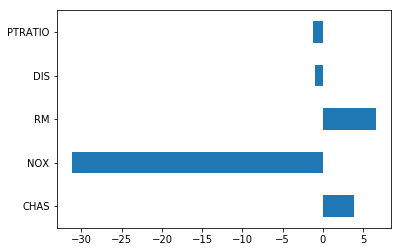

In [19]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

### ==> 주거당 평균 객실 수(RM)가 높을수록 주택가격(MEDV)이 높다.
### ==> 산화질소 농도(NOX)가 낮을수록 주택가격(MEDV)가 높다.


## [최종회귀식]
### y = 24.0499 + 3.9284CHAS - 31.2052NOX + 6.6431RM - 0.9312DIS -1.2297PTRTIO 

In [23]:
scaler = StandardScaler()
cols = df_raw_X.columns

np_scaled = scaler.fit_transform(df_raw_X)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["MEDV"]= df_raw["MEDV"]
reg_model_scaled = smf.ols(formula = "MEDV ~ CHAS + NOX + RM + DIS + PTRATIO", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     172.9
Date:                Thu, 02 May 2019   Prob (F-statistic):          1.46e-106
Time:                        19:07:51   Log-Likelihood:                -1586.2
No. Observations:                 506   AIC:                             3184.
Df Residuals:                     500   BIC:                             3210.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.249     90.597      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### ==> 주거당 평균 객실 수(RM)이 가장 중요하다.

## ------------------------------------------------------------------------------------------------------------------------

## 의사결정나무

## [패키지 불러오기]

In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

## [데이터 불러오기]

In [25]:
df_raw = pd.read_csv("/home/pirl/Downloads/BOSTON_HOUSING.csv", engine = "python")

df_raw_x = df_raw.drop("MEDV", axis = 1, inplace = False)
df_raw_y = df_raw["MEDV"]

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, 
                                                                df_raw_y,
                                                                test_size = 0.3, 
                                                                random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 13)
train data Y size : (354,)
test data X size : (152, 13)
test data Y size : (152,)


### ==> train 데이터 354건, test 데이터 13건

## [기본 옵션으로 트리 생성]

In [26]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234) 
tree_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.858


### ==> train 데이터의 설명력은 100%, 반면 test 데이터의 설명력은 85.8%이다.

## [현재 생성된 트리 모델의 옵션 확인]

In [27]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

## [min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능]

In [29]:
train_score = []; test_score = [ ]
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234 , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [30]:
# 모델 설명력 확인
df_score_leaf.round(3)

MinSamplesLeaf  TrainScore  TestScore
0                1       1.000      0.858
1                2       0.987      0.849
2                3       0.973      0.865
3                4       0.951      0.854
4                5       0.928      0.861
5                6       0.898      0.853
6                7       0.885      0.843
7                8       0.874      0.838
8                9       0.862      0.831
9               10       0.849      0.831
10              11       0.846      0.830
11              12       0.839      0.819
12              13       0.833      0.817
13              14       0.829      0.812
14              15       0.828      0.818
15              16       0.824      0.813
16              17       0.822      0.807
17              18       0.820      0.808
18              19       0.811      0.804

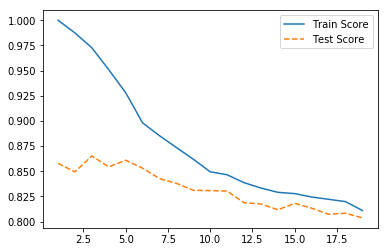

In [31]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [32]:
v_feature_names = df_train_x.columns
# 노드의 최소 자료 수=15  모델 
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf = 15)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",
                feature_names = v_feature_names, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


### ==> min_samples_leaf = 15

## [min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능]

In [34]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=15
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [35]:
# 모델 설명력 확인
df_score_split.round(3)

MinSamplesSplit  TrainScore  TestScore
0                 4       0.828      0.818
1                 6       0.828      0.818
2                 8       0.828      0.818
3                10       0.828      0.818
4                12       0.828      0.818
5                14       0.828      0.818
6                16       0.828      0.818
7                18       0.828      0.818
8                20       0.828      0.818
9                22       0.828      0.818
10               24       0.828      0.818
11               26       0.828      0.818
12               28       0.828      0.818
13               30       0.828      0.818
14               32       0.826      0.818
15               34       0.826      0.818
16               36       0.826      0.818
17               38       0.820      0.817

In [36]:
# 설명력을 그래프로 표현
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()